# Modeling and Simulation in Python

Starter code for the orbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


Alexandra Maycock- Studio 2

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from numpy import *

In [3]:
# units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [22]:
# And an initial condition (with everything in SI units)


r_0 = 4436.82e9 * m
v_0 = -6100 * m/s

init = State(x = r_0,
             y = 0 * m,
             vx = 0 * m / s,
             vy = v_0)

,values
x,4436820000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,-6100.0 meter / second


In [93]:
# Making a system object

r_pluto = 1187000 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_pluto,
                m2=0.01303e24 * kg,
                t_0=0 * s,
                t_end=7820000 * s,
                slices = 7)


,values
init,x 4436820000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,696695000.0 meter
m2,1.303e+22 kilogram
t_0,0 second
t_end,7820000 second
slices,7


In [94]:
# function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    r = Vector(x, y)
    v = Vector(vx, vy)
 
    force_mag = G * m1 * m2 / r.mag**2
    force = r.hat() * force_mag 
   # force = Vector(G*m1*m2/x**2, G*m1*m2/y**2)
    return force

In [95]:
universal_gravitation(init, system)

<Quantity([8.78661872e+16 0.00000000e+00], 'newton')>

In [96]:

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    

    force_x, force_y = universal_gravitation(state, system)
    dxdt = vx
    dydt = vy
    dvxdt = -force_x / m2
    dvydt = -force_y / m2
    
    return dxdt, dydt, dvxdt, dvydt

In [97]:
#test the slope function

slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-6100.0, 'meter / second')>,
 <Quantity(-6.743375839653671e-06, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [98]:
# Event function that stops the simulation upon collision

def event_func(state, t, system):
    x, y, vx, vy = state
    position = Vector(x,y)
    return position.mag - system.r_final

In [99]:
events = event_func(init, 0, system)

<Quantity(4436123305000.0, 'meter')>

In [100]:
dt = (system.t_end - system.t_0)/ system.slices
times = (linrange(system.t_0, system.t_end, dt))

<Quantity([      0.         1117142.85714286 2234285.71428571 3351428.57142857
 4468571.42857143 5585714.28571429 6702857.14285714], 'second')>

In [101]:
#  run the simulation


results, details = run_ode_solver(system, slope_func, events=event_func, t_eval = times )
details

,values
sol,None
t_events,[[]]
nfev,92
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [102]:
results

,x,y,vx,vy
0.000000e+00,4.436820e+12,0.000000e+00,0.000000,-6100.000000
1.117143e+06,4.436816e+12,-6.814569e+09,-7.533310,-6099.994215
2.234286e+06,4.436803e+12,-1.362913e+10,-15.066595,-6099.976859
3.351429e+06,4.436782e+12,-2.044366e+10,-22.599831,-6099.947933
4.468571e+06,4.436753e+12,-2.725815e+10,-30.132993,-6099.907437
5.585714e+06,4.436715e+12,-3.407259e+10,-37.666055,-6099.855370
6.702857e+06,4.436669e+12,-4.088696e+10,-45.198994,-6099.791734


In [112]:
#conversions

day = results.index/86400

def convert_m(meters):
    
    #meters to kilometers
    km = meters/1000
    
    #kilometers to million kilometers
    Mkm = km/1e6
    
    return Mkm

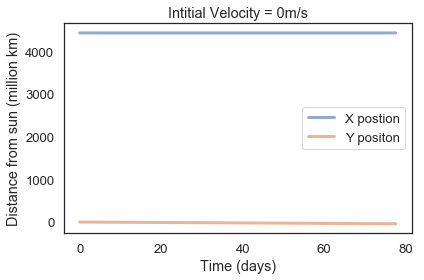

In [113]:
#Zero Initial Velocity
plot(day,convert_m(results.x), label = 'X postion')
plot(day,convert_m(results.y), label = 'Y positon')
decorate(title = 'Intitial Velocity = 0m/s',
         xlabel='Time (days)',
         ylabel='Distance from sun (million km)')

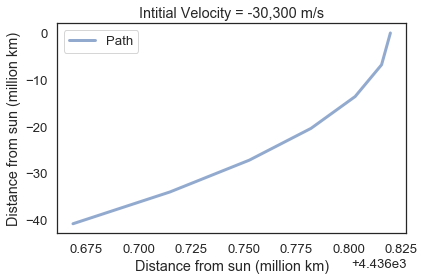

In [114]:

plot(convert_m(results.x),convert_m(results.y), label ='Path')
decorate(title = 'Intitial Velocity = -30,300 m/s',
         xlabel='Distance from sun (million km)',
         ylabel='Distance from sun (million km)')

In [106]:
S = results.index[0]
E = results.index[1]
a_vec = Vector(results.x[results.index[0]], results.y[results.index[0]])
A = a_vec.mag
b_vec = Vector(results.x[results.index[1]], results.y[results.index[1]])
B = b_vec.mag
C = sqrt((results.x[results.index[1]]-results.x[results.index[0]])**2 +(results.y[results.index[1]]-results.y[results.index[0]])**2 )
SP = (A+B+C)/2
area = sqrt(SP * (SP - A) * (SP - B) * (SP - C))

state= State(S=S, E=E, A=A, B=B, C=C, SP=SP, area=area)

,values
S,0
E,1.11714e+06
A,4436820000000.0 dimensionless
B,4436821025401.564 dimensionless
C,6.81457e+09
SP,4440227797987.485 dimensionless
area,1.511750862369213e+22 dimensionless


In [107]:
def area_of_sector(results,system,state):
    unpack(system)
    
    dt = (t_end-t_0)/slices
    
    t_interval = linrange(t_0,t_end,dt)
    
    frame = TimeFrame(columns = state.index)
    frame.row[1] = state
     
    reps = linrange (1, slices)
    
    for t in reps:
        frame.row[t+1] = table_row(frame.row[t], t, system, results)
        
    return frame
    

In [108]:
def table_row(state, t , system, results):
    s, e, a, b, c, sp, area = state
    unpack(system)
    
    dt = (t_end-t_0)/slices/UNITS.s
    news = e
    newe = news + dt
    
    
    a_vec = Vector(results.x[results.index[t-1]], results.y[results.index[t-1]])       
    newa = a_vec.mag
    
    b_vec = Vector(results.x[results.index[t]], results.y[results.index[t]])
    newb = b_vec.mag 

    newc = sqrt((results.x[results.index[t]]-results.x[results.index[t-1]])**2 +(results.y[results.index[t]]-results.y[results.index[t-1]])**2 )
    
    newsp = (newa + newb + newc)/2
    newarea = sqrt(newsp * (newsp - newa) * (newsp - newb) * (newsp - newc))
    
    return State (S=news, E=newe, A=newa, B=newb, C=newc, SP=newsp, area=newarea)
    
    
    

In [109]:
numbs = area_of_sector(results, system, state)

,S,E,A,B,C,SP,area
1,0,1.11714e+06,4436820000000.0 dimensionless,4436821025401.564 dimensionless,6.814571e+09,4440227797987.485 dimensionless,1.511750862369213e+22 dimensionless
2,1.11714e+06,2234285.714285714 dimensionless,4436820000000.0 dimensionless,4436821025401.564 dimensionless,6.814571e+09,4440227797987.485 dimensionless,1.511750862369213e+22 dimensionless
3,2234285.714285714 dimensionless,3351428.571428571 dimensionless,4436821025401.564 dimensionless,4436824101602.887 dimensionless,6.814568e+09,4440229847522.591 dimensionless,1.511750862369975e+22 dimensionless
4,3351428.571428571 dimensionless,4468571.428571428 dimensionless,4436824101602.887 dimensionless,4436829228593.867 dimensionless,6.814563e+09,4440233946586.078 dimensionless,1.51175086237392e+22 dimensionless
5,4468571.428571428 dimensionless,5585714.285714285 dimensionless,4436829228593.867 dimensionless,4436836406357.672 dimensionless,6.814555e+09,4440240095164.48 dimensionless,1.5117508623754957e+22 dimensionless
6,5585714.285714285 dimensionless,6702857.142857143 dimensionless,4436836406357.672 dimensionless,4436845634870.734 dimensionless,6.814545e+09,4440248293237.611 dimensionless,1.511750862372439e+22 dimensionless
7,6702857.142857143 dimensionless,7820000.0 dimensionless,4436845634870.734 dimensionless,4436856914102.752 dimensionless,6.814533e+09,4440258540778.588 dimensionless,1.5117508623766076e+22 dimensionless


In [110]:
results

,x,y,vx,vy
0.000000e+00,4.436820e+12,0.000000e+00,0.000000,-6100.000000
1.117143e+06,4.436816e+12,-6.814569e+09,-7.533310,-6099.994215
2.234286e+06,4.436803e+12,-1.362913e+10,-15.066595,-6099.976859
3.351429e+06,4.436782e+12,-2.044366e+10,-22.599831,-6099.947933
4.468571e+06,4.436753e+12,-2.725815e+10,-30.132993,-6099.907437
5.585714e+06,4.436715e+12,-3.407259e+10,-37.666055,-6099.855370
6.702857e+06,4.436669e+12,-4.088696e+10,-45.198994,-6099.791734


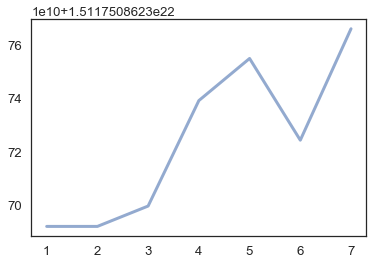

In [111]:
plot(numbs.area)

In [47]:
numbs.S[1]-numbs.E[1]

-1117142857.142857

In [48]:
numbs.S[2]-numbs.E[2]

<Quantity(-1303333333.3333335, 'dimensionless')>

In [49]:
numbs.S[3]-numbs.E[3]

<Quantity(-1303333333.333333, 'dimensionless')>